#**ANALYSIS  OF GOOGLE_PLAY_STORE DATA**

In [0]:
#importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
data = pd.read_csv("googleplaystore.csv")

In [222]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [223]:
#getting the info about datatypes and no of non missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [224]:
data.dtypes.value_counts()

object     12
float64     1
dtype: int64

In [225]:

data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [226]:
max(data['Rating'])

19.0

In [227]:
data['Rating'].isnull().sum()

1474

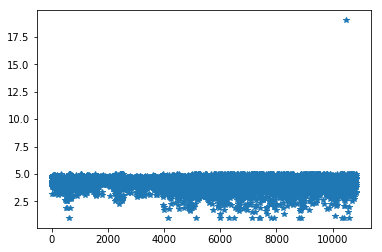

In [228]:
plt.plot(data['Rating'],'*')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


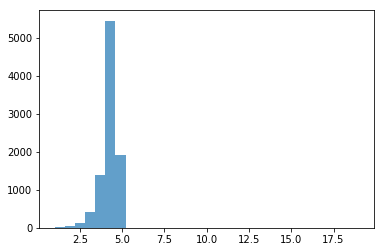

In [229]:
plt.hist(data['Rating'],bins=30,alpha=0.7)
plt.show()



In [230]:
data[data['Rating']>10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [0]:
data['Rating'] = data['Rating'].fillna(data['Rating'].median())

In [232]:
data['Rating'].isnull().sum()

0

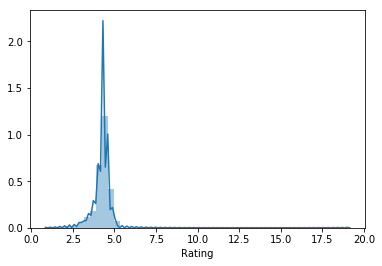

In [233]:
sns.distplot(data['Rating'])

In [234]:
data[data['Installs'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [0]:
data.drop([10472],inplace=True)

In [0]:
data['Installs'] = data['Installs'].map(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))

In [0]:
data['Installs'] = data['Installs'].map(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
data['Installs'] = data['Installs'].map(lambda x: float(x))

In [238]:
data.iloc[85,:]

App               CarMax – Cars for Sale: Search Used Car Inventory
Category                                          AUTO_AND_VEHICLES
Rating                                                          4.4
Reviews                                                       21777
Size                                             Varies with device
Installs                                                      1e+06
Type                                                           Free
Price                                                             0
Content Rating                                             Everyone
Genres                                              Auto & Vehicles
Last Updated                                         August 4, 2018
Current Ver                                      Varies with device
Android Ver                                      Varies with device
Name: 85, dtype: object

In [0]:
data['Type'].fillna(str(data['Type'].mode().values[0]), inplace=True)
data['Current Ver'].fillna(str(data['Current Ver'].mode().values[0]), inplace=True)
data['Android Ver'].fillna(str(data['Android Ver'].mode().values[0]), inplace=True)


In [0]:
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

In [243]:
data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


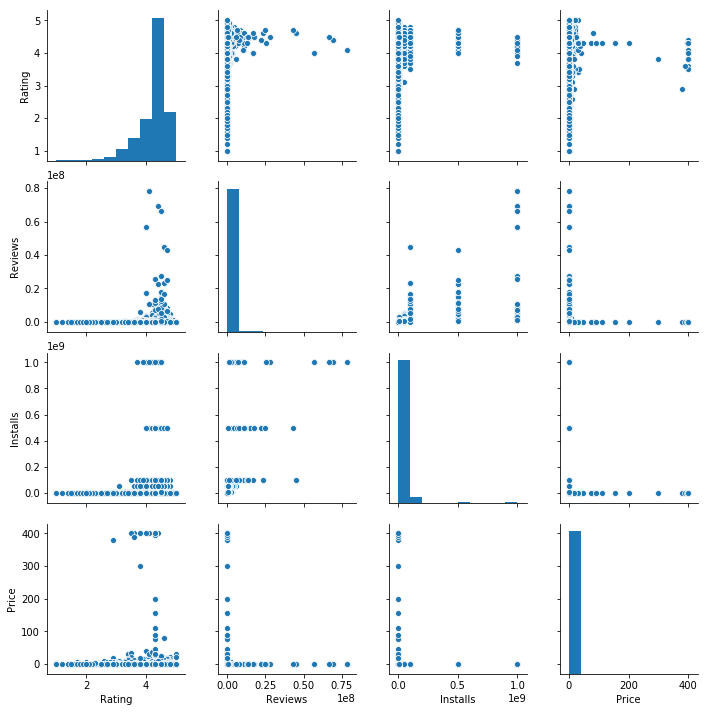

In [247]:
sns.pairplot(data)

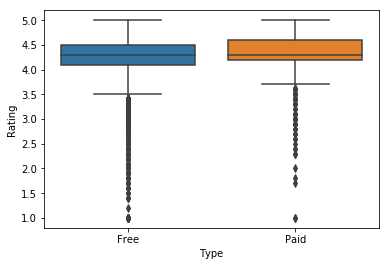

In [256]:
 sns.boxplot(x='Type',y='Rating',data = data)

In [0]:
grp = data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z) 

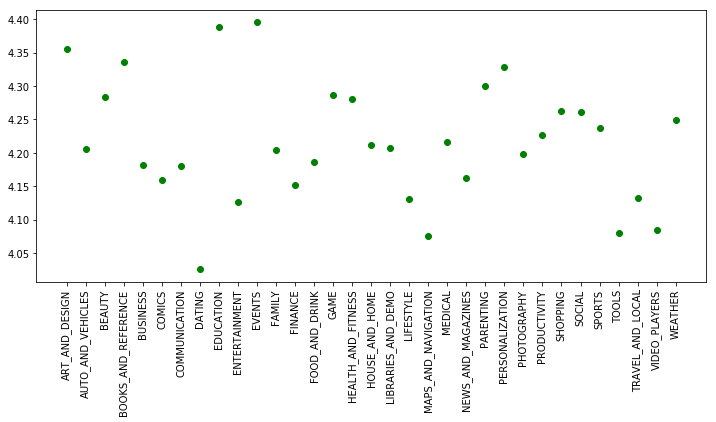

In [261]:
plt.figure(figsize=(12,5))
plt.plot(x, "ro", color='g')
plt.xticks(rotation=90)
plt.show()

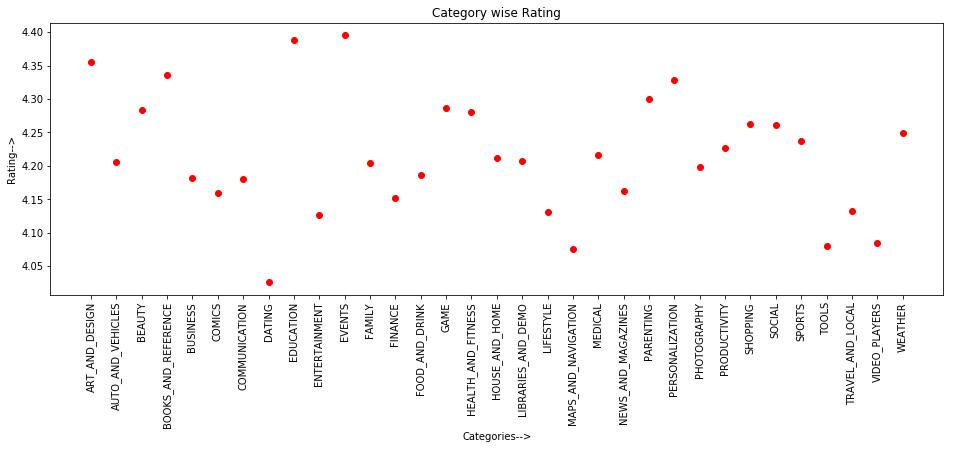

In [262]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

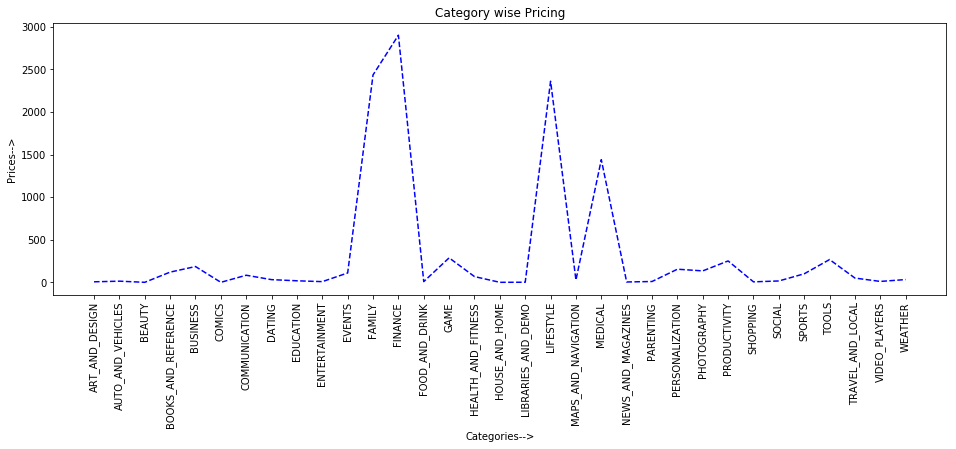

In [263]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

Text(0, 0.5, 'Reviews-->')

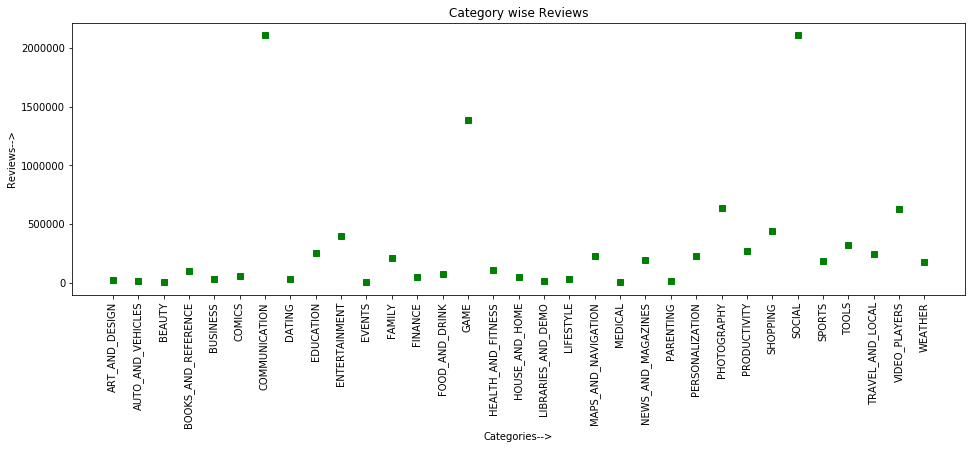

In [264]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
